In [1]:
import sqlalchemy
from sqlalchemy import MetaData
from sqlalchemy import Table
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# create path to database
db_uri = "sqlite:////Users/fernandawolburg/Downloads/PHXproject.db"
engine = create_engine(db_uri)

# Create a MetaData instance
metadata = MetaData()

# reflect db schema to MetaData
metadata.reflect(bind=engine)
print(metadata.tables)

immutabledict({'PHXdata': Table('PHXdata', MetaData(bind=None), Column('index', INTEGER(), table=<PHXdata>, primary_key=True, nullable=False), Column('CheckPaymentDate', TEXT(), table=<PHXdata>, nullable=False), Column('DeptDescrptn', TEXT(), table=<PHXdata>), Column('VendorName', TEXT(), table=<PHXdata>), Column('CommitmtItemName', TEXT(), table=<PHXdata>), Column('InvoiceNetAmt', INTEGER(), table=<PHXdata>), schema=None)})


In [4]:
# Create a path to the database
engine = create_engine("sqlite:////Users/fernandawolburg/Downloads/PHXproject.db")

# reflect database and tables
Base = automap_base()
Base.prepare(engine, reflect = True)

# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
# find the name of the tables in the db
Base.classes.keys()

['PHXdata']

In [6]:
# assign the table to a variable
data = Base.classes.PHXdata

In [7]:
# Get column information
inspector = inspect(engine)
print(inspector.get_columns('PHXdata'))

[{'name': 'index', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'CheckPaymentDate', 'type': TEXT(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'DeptDescrptn', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'VendorName', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'CommitmtItemName', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'InvoiceNetAmt', 'type': INTEGER(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


# Spending by Date

In [8]:
# Create a dataframe for the dates, the commitment item, and the invoice item
commitment_results = session.query(data.CheckPaymentDate, data.CommitmtItemName, data.InvoiceNetAmt).all()

# loop throuh the results in the query and assign them to a variable each
Date = [commitment_results[0] for result in commitment_results[0:]]
Item = [commitment_results[1] for result in commitment_results[0:]]
Amount = [commitment_results[2] for result in commitment_results[0:]]

# create the dataframe
commitment_df= pd.DataFrame(commitment_results, 
                      columns=['Date', 'Item', 'Amount'] )

commitment_df.head()

,Date,Item,Amount
0,4/8/2019,Trust Liab and Dep,29.95
1,4/2/2019,Inventories,"4,566.33"
2,4/8/2019,Small Tools/ Equip,646.32
3,4/10/2019,Inventories,"3,877.92"
4,4/10/2019,Inventories,"1,657.35"


In [9]:
# fix the date column
commitment_df['Date'] = commitment_df['Date'].str.replace('/', '-')

commitment_df.head()

,Date,Item,Amount
0,4-8-2019,Trust Liab and Dep,29.95
1,4-2-2019,Inventories,"4,566.33"
2,4-8-2019,Small Tools/ Equip,646.32
3,4-10-2019,Inventories,"3,877.92"
4,4-10-2019,Inventories,"1,657.35"


In [10]:
# obtain the total amount spent on on a given day
qry = session.query(func.sum(data.InvoiceNetAmt).label("total_amount"))
qry = qry.group_by(data.CheckPaymentDate)

In [11]:
# pass the values to a list
total_amount = [list(i) for i in qry]

# remove the square brackets from the list above
total_amount = [x[0] for x in total_amount]
total_amount

[161954.54000000007,
 151491.2999999998,
 203458.82,
 368256.9500000011,
 135910.7899999997,
 90766.23000000001,
 151176.5599999999,
 186579.42999999996,
 230863.4200000001,
 291807.9499999997,
 172242.11999999973,
 410563.92,
 65214.739999999976,
 557115.85,
 192329.21999999983,
 135279.37000000017,
 376832.3899999994,
 166721.9499999997,
 345852.67000000057,
 247971.41,
 125117.18000000012,
 233181.2300000003,
 240231.31000000006,
 146266.9499999999,
 216670.77000000005,
 168475.6700000001,
 435298.2100000001,
 178487.83999999956,
 141808.28999999995,
 351010.18000000063,
 241588.91999999963,
 200266.3900000005,
 130842.8899999999,
 385742.01999999984,
 286647.6799999997,
 209517.80999999994,
 372182.02,
 157679.69999999984,
 194954.62999999992,
 128184.42999999998,
 188436.06,
 160017.8400000003,
 258381.6199999994,
 119955.89000000017,
 147248.54000000012,
 209048.9800000002,
 246306.40000000005,
 377152.60999999987,
 441980.8399999999,
 254000.8600000001,
 135655.65000000002,
 167

In [12]:
# find the unique values for the dates and add them to a list
qry2 = session.query(data.CheckPaymentDate).distinct()
unique_dates = [list(i) for i in qry2]

#idea: make a bar graph that shows how much was spent on each day, use d3 and javascript to see the amount 
# as the mouse hovers over each bar

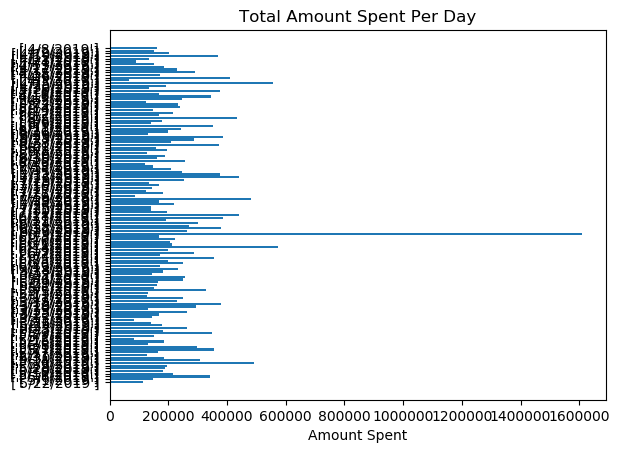

In [13]:
# plot the amount spent each day
plt.rcdefaults()
fig, ax = plt.subplots()

# set x and y variables
x = total_amount
y = unique_dates
y_pos = np.arange(len(unique_dates))

ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Amount Spent')
ax.set_title('Total Amount Spent Per Day')

plt.show()

# Spending by Department

In [14]:
# find the dept description and the amount spent
dept_results = session.query(data.DeptDescrptn, data.InvoiceNetAmt).all()

# loop throuh the results in the query and assign them to a variable each
Department = [dept_results[0] for result in dept_results[0:]]
Amount = [dept_results[1] for result in dept_results[0:]]

# create the dataframe
dept_df= pd.DataFrame(dept_results, 
                      columns=['Department', 'Amount'] )

dept_df.head()

,Department,Amount
0,Municipal Court,29.95
1,Fire,"4,566.33"
2,Street Transportation,646.32
3,Fire,"3,877.92"
4,Fire,"1,657.35"


In [15]:
# find how much was spent by each department and arrange it from highest to lowest spending
qry3 = session.query(data.DeptDescrptn).group_by(data.DeptDescrptn).order_by(func.sum(data.InvoiceNetAmt).desc())
qry4 = session.query(func.sum(data.InvoiceNetAmt)).group_by(data.DeptDescrptn).order_by(func.sum(data.InvoiceNetAmt).desc())

# add both to a list for flask app
dept_spending = [list(i) for i in qry3]
dept_amount = [list(i) for i in qry4]

In [16]:
# remove the square brackets
dept_spending = [x[0] for x in dept_spending]
dept_amount = [x[0] for x in dept_amount]

In [20]:
# turn lists into series
dept_list = list(zip(dept_spending, dept_amount))

# create a dataframe form the values obtained
dept_grouped_df = pd.DataFrame(dept_list, 
                      columns = ['Department', 'Amount'])
dept_grouped_df

,Department,Amount
0,Public Works,8337714.33
1,Water Services,3601905.24
2,Aviation,2742753.42
3,Police,2187086.22
4,Parks and Recreation,2132161.61
5,Street Transportation,1639712.24
6,Fire,1536176.71
7,Housing,1063484.23
8,Phoenix Convention Center,825623.30
9,Trust,793422.84
